In [1]:
import fiftyone as fo
dataset_list = fo.list_datasets()
print(dataset_list)

['2024.08.09.10.12.04', 'ALL Fire and Smoke', 'Fire and Smoke Segmentation.v4i.coco-segmentation', 'fire smoke.v1i.coco', 'fire-8', 'fire-smoke-detection', 'fire-smoke-detection.v6i.coco-segmentation', 'patches_data', 'pipeline_data', 'rtpv-dataset', 'rtvp-dataset-groundingdino', 'rtvp_copy', 't_data']


In [91]:
# dataset_name_to_delete = "practice_dataset"

# fo.delete_dataset(dataset_name_to_delete)

In [ ]:
data/SURENDAR/25072023/labels_my-project-name_2023-08-30-04-48-15/.ipynb_checkpoints/DSC00193-checkpoint.txt 

In [15]:
import os
import fiftyone as fo

list_of_images = []

for root, dirs, files in os.walk('data', topdown=True):
    for file in files:
        if file.endswith('.JPG'):
            list_of_images.append(os.path.join(root, file))

dataset = fo.Dataset.from_images(list_of_images, name = "pipeline_data")
dataset.persistent = True
dataset.save()

 100% |█████████████| 11370/11370 [741.3ms elapsed, 0s remaining, 15.4K samples/s]      


In [19]:
from PIL import Image


def get_image_dimensions(image_path):
    try:
        with Image.open(image_path) as img:
            width, height = img.size
        return width, height
    except Exception as e:
        raise ValueError(f"Unable to read image dimensions for {image_path}: {str(e)}")

with fo.ProgressBar() as pb:
    for sample in pb(dataset):
        image_path = sample['filepath']
        
        try:
            iw, ih = get_image_dimensions(image_path)
        except ValueError as ve:
            print(ve)
            continue  

        detections = []
        text_file = sample['filepath'].replace('images', 'kitti_data')
        text_file = text_file.replace('.JPG', '.txt')
        

        with open(text_file, 'r') as fr:
            lines = fr.readlines()

            for line in lines:
                line = line.replace("ELECTRIC POLES","ELECTRIC_POLES")
                line = line.replace("PERMANENT STRUCTURES","PERMENANT_STRUCTURES")
                line = line.replace("PERMENANT STRUCTURES","PERMENANT_STRUCTURES")
                line = line.replace("TEMPORARY STRUCTURES","TEMPORARY_STRUCTURES")
                cls,_,_,_,x1,y1,x2,y2,_,_,_,_,_,_,_,score =  line.split(' ')
                x1,y1,x2,y2,score = float(x1),float(y1),float(x2),float(y2),float(score) 
                rel_box = [float(x1 / iw),float( y1 / ih),float( (x2-x1) / iw),float( (y2-y1) / ih)]
                detections.append(
                    fo.Detection(
                        label=cls,
                        bounding_box=rel_box,
                        confidence=score
                    )
                )
            
            
            sample["ground_truth"] = fo.Detections(detections=detections)
            sample.save()



    


            
        # if len(lines) > 0:
        #     for line in lines:
        #         parts = line.split(' ')

        #         if len(parts) == 16:
        #             cls = label_mapping.get(parts[0], parts[0])
        #             bbox_values = list(map(float, parts[4:8]))  # Extract x1, y1, x2, y2
        #             score = float(parts[-1])

        #         elif len(parts) == 17:
        #             original_label = ' '.join(parts[:2])
        #             cls = label_mapping.get(original_label, original_label)
        #             bbox_values = list(map(float, parts[5:9]))  # Extract x1, y1, x2, y2
        #             score = float(parts[-1])

        #         else:
        #             print(f"Invalid number of values in line: {line}")
        #             continue

        #         x1, y1, x2, y2 = bbox_values
        #         rel_box = [x1 / iw, y1 / ih, (x2 - x1) / iw, (y2 - y1) / ih]

        #         detections.append(
        #             fo.Detection(
        #                 label=cls,
        #                 bounding_box=rel_box,
        #                 confidence=score
        #             )
        #         )

        # sample["ground_truth"] = fo.Detections(detections=detections)
        # sample.save()


 100% |█████████████| 11370/11370 [15.4s elapsed, 0s remaining, 608.9 samples/s]      


In [20]:
dataset

Name:        pipeline_data
Media type:  image
Num samples: 11370
Persistent:  True
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)

In [11]:
import fiftyone as fo
dataset = fo.load_dataset("pipeline_data")


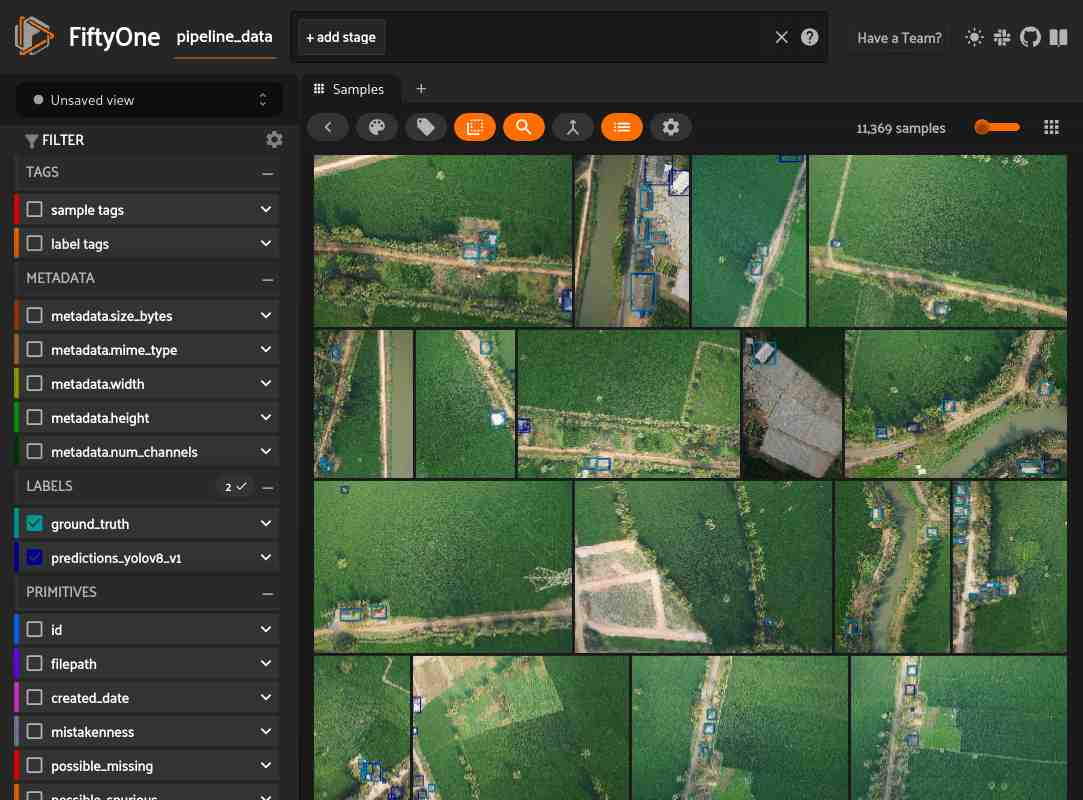

In [13]:
session = fo.launch_app(dataset)